# B1 Selective RF Pulse Design

In [1]:
%matplotlib notebook
import numpy as np
import sigpy as sp
import sigpy.mri as mr
import sigpy.mri.rf as rf
import sigpy.plot as pl
import scipy.signal as signal
import matplotlib.pyplot as pyplot

## Parameters 

In [2]:
dt = 2e-6 # sampling period
d1 = 0.01 # passband ripple
d2 = 0.01 # stopband ripple
tb = 4 # time-bandwidth product
ptype = 'ex' # 'st', 'ex', 'inv' or 'sat'
pbw = 0.5 # gauss, passband width
pbc = 5 # gauss, passband center
flip = np.pi/4 # radians, flip angle

## Design Excitation Pulse

<IPython.core.display.Javascript object>


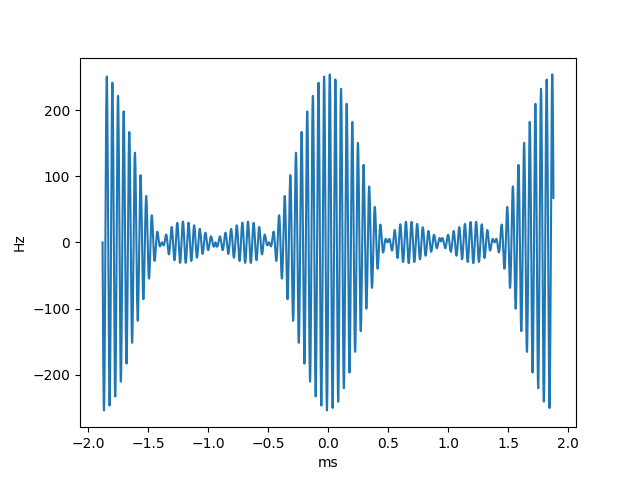

<IPython.core.display.Javascript object>


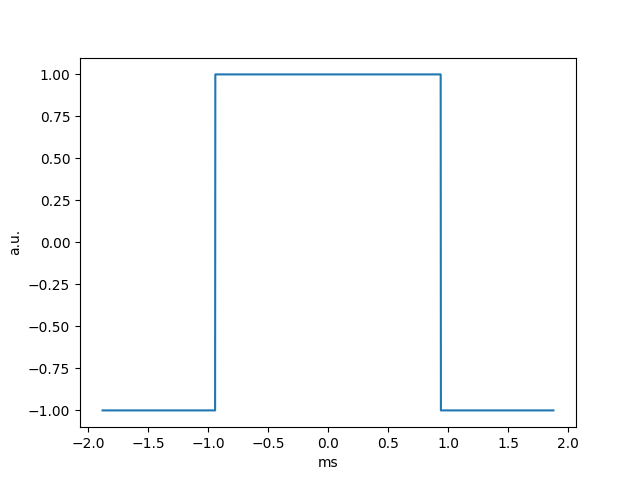

Text(0, 0.5, 'a.u.')

In [3]:
[rf_am, rf_fm] = rf.b1sel.dzb1rf(dt, tb, ptype, flip, pbw, pbc, d1, d2)
T = np.size(rf_fm)*dt
t = np.arange(-T/2,T/2,dt)*1000
pyplot.figure()
pyplot.plot(t,rf_fm)
pyplot.xlabel('ms')
pyplot.ylabel('Hz')
pyplot.figure()
pyplot.plot(t,rf_am)
pyplot.xlabel('ms')
pyplot.ylabel('a.u.')

# Simulate the excitation pulse's Mxy profile

<IPython.core.display.Javascript object>


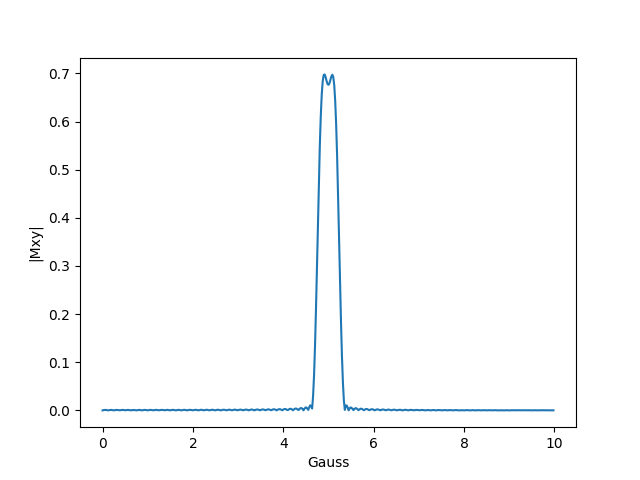

Text(0, 0.5, '|Mxy|')

In [4]:
n = np.size(rf_am)
b1 = np.arange(0, 2*pbc, 2*pbc/np.size(rf_am)*4) # b1 grid we simulate the pulse over
b1 = np.reshape(b1, (np.size(b1),1))
[a, b] = rf.sim.abrmnd(2*np.pi*dt*rf_fm, b1, 2*np.pi*4258*dt*np.reshape(rf_am, (np.size(rf_am),1)))
Mxy = 2*np.multiply(np.conj(a), b)
pyplot.figure()
pyplot.plot(b1, np.abs(Mxy))
pyplot.xlabel('Gauss')
pyplot.ylabel('|Mxy|')


# Design gSlider excitation pulses

<IPython.core.display.Javascript object>


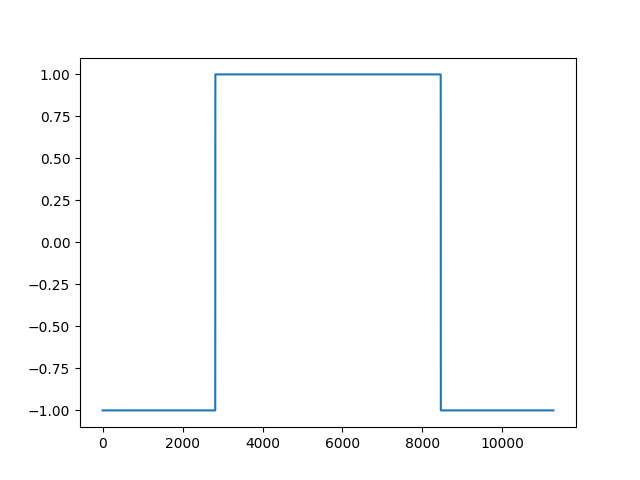

<IPython.core.display.Javascript object>


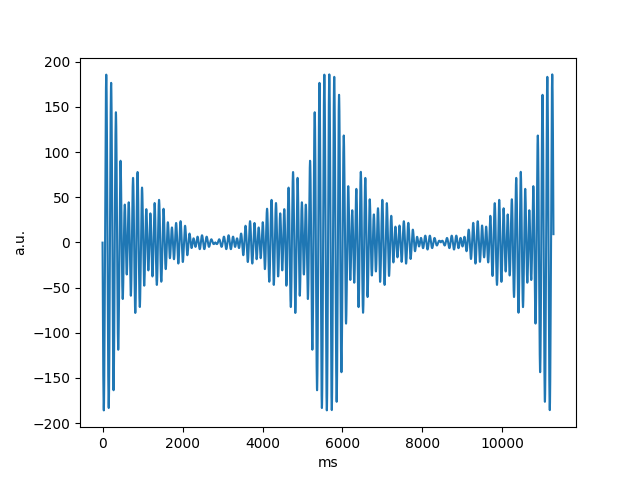

11276


In [5]:
G = 5
flip = np.pi/2
ptype = 'ex' # 'ex' or 'st'
tb = 12
d1 = 0.01
d2 = 0.01
pbc = 1 # gauss, passband center
pbw = 0.25 # passband width
dt = 2e-6 # seconds, sampling rate
[om1, dom] = rf.b1sel.dzb1gSliderrf(dt, G, tb, ptype, flip, pbw, pbc, d1, d2)

# plot the first pulse
pyplot.figure()
pyplot.plot(om1[:, 0])
pyplot.figure()
pyplot.plot(dom[:, 0])
pyplot.xlabel('ms')
pyplot.ylabel('a.u.')


<IPython.core.display.Javascript object>


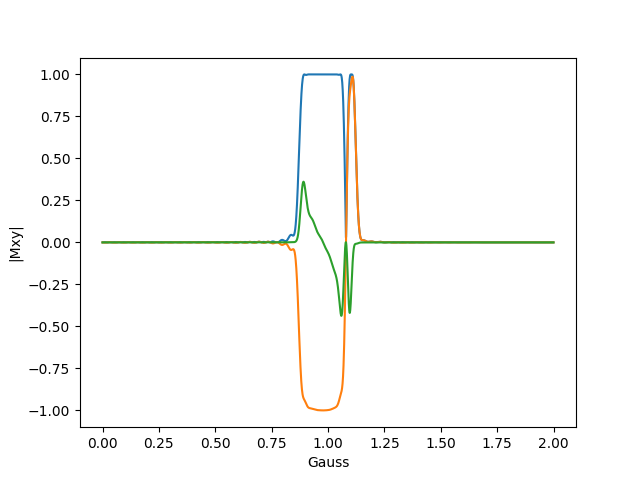

Text(0, 0.5, '|Mxy|')

In [6]:
n = np.shape(om1)[0]
b1 = np.arange(0, 2*pbc, 2*pbc/n*4) # b1 grid we simulate the pulse over
b1 = np.reshape(b1, (np.size(b1),1))
[a, b] = rf.sim.abrmnd(2*np.pi*dt*dom[:, 0], b1, 2*np.pi*4258*dt*np.reshape(om1[:, 0], (n, 1)))
Mxy = 2*np.multiply(np.conj(a), b)
pyplot.figure()
pyplot.plot(b1, np.abs(Mxy))
pyplot.plot(b1, np.real(Mxy))
pyplot.plot(b1, np.imag(Mxy))
pyplot.xlabel('Gauss')
pyplot.ylabel('|Mxy|')